**Telesales Prediction Notebook**

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

In [6]:
# Load the dataset
df = pd.read_csv('D:/projects/classic learn/sales_pred/datasets/MTA_NYCT_Customer_Engagement_Statistics__2017-2022.csv')

In [7]:
# Display basic information about the dataset
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 23 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   Month                                                                        61 non-null     object 
 1   Month of Year                                                                61 non-null     int64  
 2   Year                                                                         61 non-null     int64  
 3   Agency                                                                       61 non-null     object 
 4   Total Incoming Calls                                                         61 non-null     int64  
 5   Calls Answered                                                               61 non-null     int64  
 6   Calls Answered Rate                         

In [9]:
# Handle missing values
df['Social Media Customer Satisfaction Score'] = df['Social Media Customer Satisfaction Score'].fillna(df['Social Media Customer Satisfaction Score'].mean())

In [ ]:
# Convert date columns to datetime
df['Date'] = pd.to_datetime(df['Month'] + ' ' + df['Year'].astype(str))

In [11]:
# Drop unnecessary columns
df = df.drop(['Agency'], axis=1)

In [12]:
# Feature Engineering
df['Calls Answered Rate'] = df['Calls Answered'] / df['Total Incoming Calls']
df['Avg Wait Time per Call'] = df['Total Wait Time (min)'] / df['Total Incoming Calls']

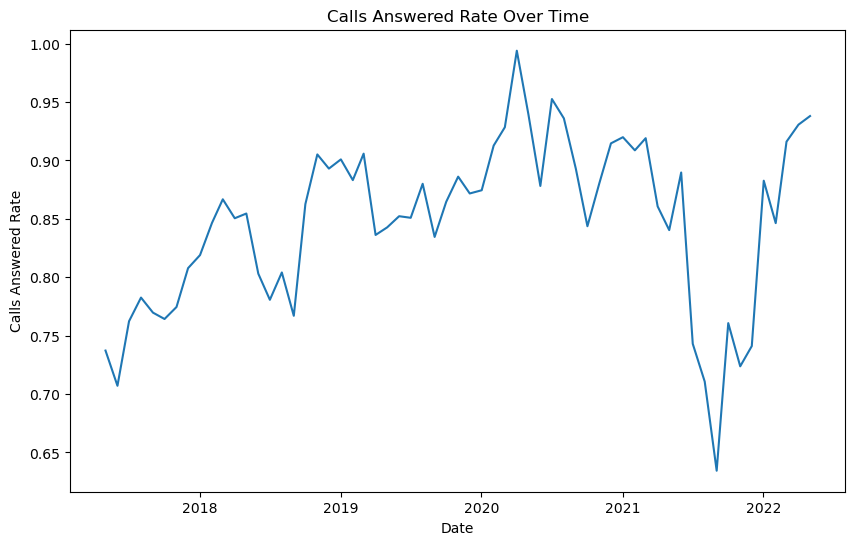

In [13]:
# Plotting some insights
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Calls Answered Rate', data=df)
plt.title('Calls Answered Rate Over Time')
plt.show()

In [14]:
# Weekly, Monthly, Yearly Aggregation
df['Week'] = df['Date'].dt.isocalendar().week
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [15]:

# Build Models
for period in ['Week', 'Month', 'Year']:
    X = df[['Total Incoming Calls', 'Total Wait Time (min)', 'Avg Time to Answer (s)']]
    y = df['Calls Answered']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluation
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Prediction for {period}:')
    print(f'MAE: {mae}')
    print(f'MSE: {mse}')
    print(f'R2 Score: {r2}')

    # Save the model
    joblib.dump(model, f'telesales_model_{period}.pkl')

print('Models for Weekly, Monthly, and Yearly predictions saved.')


Prediction for Week:
MAE: 2918.7461538461544
MSE: 11912151.669169227
R2 Score: 0.8346174833611051
Prediction for Month:
MAE: 2848.514615384615
MSE: 11524317.422207685
R2 Score: 0.8400019853035425
Prediction for Year:
MAE: 2990.1200000000003
MSE: 11967657.966907697
R2 Score: 0.8338468609358505
Models for Weekly, Monthly, and Yearly predictions saved.
